# Setting the Environment #

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import ppscore as pps
from scipy import stats
from sklearn import preprocessing
sns.set_palette("Paired", 9 )
plt.rcParams['figure.figsize'] = [10, 5]

In [648]:
train = pd.read_csv( 'Downloads/train.csv' )
test = pd.read_csv( 'Downloads/test.csv' )
pass_id = test['PassengerId'].copy()

In [649]:
combined = [ train, test ]

In [650]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis #

<AxesSubplot:xlabel='Sex', ylabel='count'>

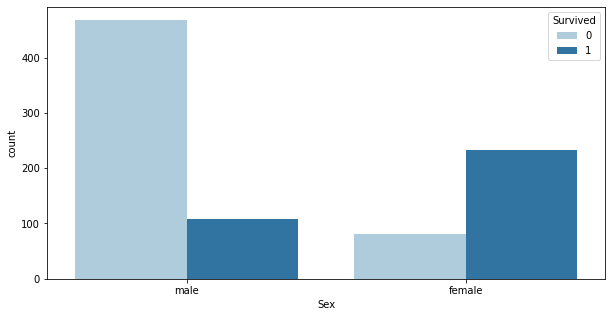

In [651]:
sns.countplot( x = 'Sex', hue = 'Survived', data = train )

In [652]:
train[['Sex', 'Survived']].groupby( ['Sex'] ).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Count', ylabel='Age'>

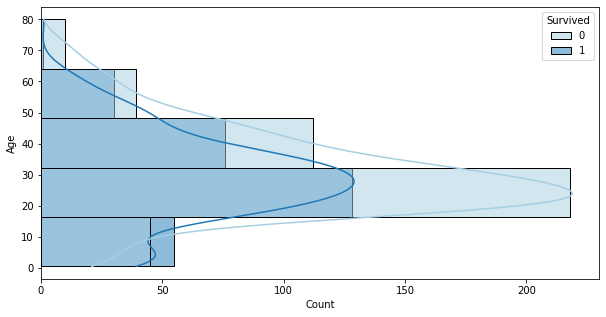

In [653]:
sns.histplot( y = 'Age', hue = 'Survived', bins = 5, data = train, kde = True )

<AxesSubplot:xlabel='Sex', ylabel='count'>

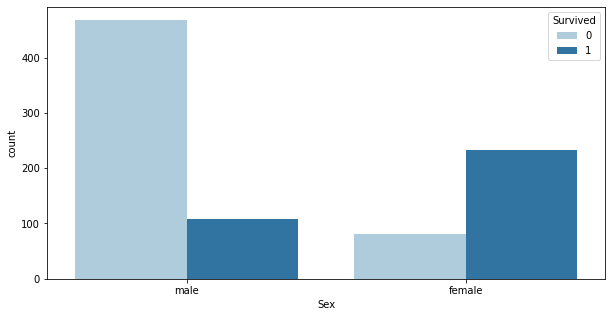

In [654]:
sns.countplot( x = 'Sex', hue = 'Survived', data = train )

In [655]:
for data in combined:
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

In [656]:
print( "---------------BEFORE-------------------")
print( train[['FamilySize', 'Survived']].groupby( by = 'FamilySize' ).mean().sort_values( by = 'Survived', ascending = False ) )

def family_group( x ):
    if( x['FamilySize'] > 7 ):
        return 1
    elif( x['FamilySize'] == 1 ):
        return 3
    elif( x['FamilySize'] <= 4 ):
        return 4
    elif( x['FamilySize'] <= 7 and x['FamilySize'] >= 5 ):
        return 2
    
for data in combined:
    data['FamilySize'] = data.apply( family_group, axis = 1 )
    
    
    
print( "---------------AFTER-------------------")
print( train[['FamilySize', 'Survived']].groupby( by = 'FamilySize' ).mean().sort_values( by = 'Survived', ascending = False ) )

---------------BEFORE-------------------
            Survived
FamilySize          
4           0.724138
3           0.578431
2           0.552795
7           0.333333
1           0.303538
5           0.200000
6           0.136364
8           0.000000
11          0.000000
---------------AFTER-------------------
            Survived
FamilySize          
4           0.578767
3           0.303538
2           0.204082
1           0.000000


In [657]:
def CabinCatUtil( x ):
    if( not pd.isnull( x['Cabin'] ) ):
        return x['Cabin'][0]
    else:
        return "M"
for data in combined:
    data['CabinCat'] = data.apply( CabinCatUtil, axis = 1 )
    data.drop( ['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId' ], axis = 1, inplace = True )
    
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CabinCat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,4,M
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,4,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,3,M
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,4,C
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,3,M


Survived
CabinCat Pclass          
A        1       0.466667
B        1       0.744681
C        1       0.593220
D        1       0.758621
         2       0.750000
E        1       0.720000
         2       0.750000
         3       1.000000
F        2       0.875000
         3       0.200000
G        3       0.500000
M        1       0.475000
         2       0.440476
         3       0.235908
T        1       0.000000

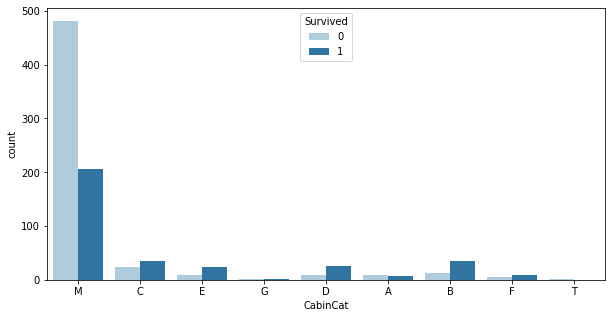

In [658]:
sns.countplot( x = 'CabinCat', hue = 'Survived', data = train )
train[['CabinCat', 'Survived', 'Pclass']].groupby( by = ['CabinCat', 'Pclass'] ).mean()

In [659]:
def CabinCatUtil( x ):
    if x['CabinCat'] in ['A','B','C']:
        return 'ABC'
    elif x['CabinCat'] in ['D', 'E']:
        return 'DE'
    elif x['CabinCat'] in ['F', 'G']:
        return 'FG'
    else:
        return 'M'
for data in combined:
    data['CabinCat'] = data.apply( CabinCatUtil, axis = 1 )

In [660]:
# CabinCat = { 'M' : 1, 'FG' : 2, 'DE' : 3, 'ABC' : 4 }
# for data in combined:
#     data['CabinCat'] = data['CabinCat'].map( CabinCat )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

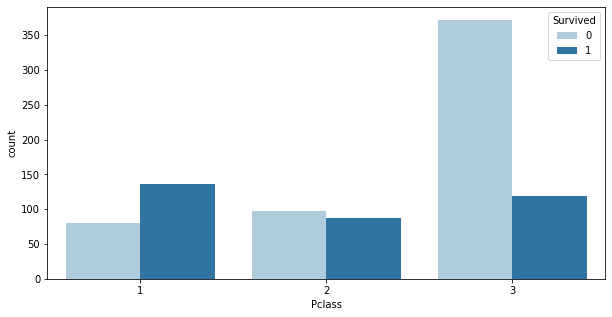

In [661]:
sns.countplot( x = 'Pclass', hue = 'Survived', data = train )

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

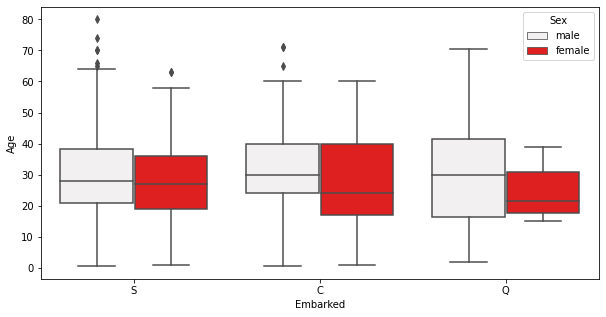

In [662]:
sns.boxplot( x = 'Embarked', y = 'Age', hue = 'Sex', data = train, color = 'r' )

In [663]:
for data in combined:
    data['Name'] = data['Name'].str.split( ", ", expand = True )[1].str.split( ".", expand = True )[0]

In [664]:
train[['Name', 'Survived', 'Sex']].groupby( by = 'Name' ).mean().sort_values( by = 'Survived', ascending = False )

,Survived
Name,
the Countess,1.000000
Mlle,1.000000
Sir,1.000000
Ms,1.000000
Lady,1.000000
Mme,1.000000
Mrs,0.792000
Miss,0.697802
Master,0.575000


In [665]:
male_group = ['Dr','Rev','Major','Col','Sir','Capt','Jonkheer','Don']
female_group = ['Miss','Mlle','Ms','Mme','Lady','the Countess']
myDict = dict()
myDict['Mr'] = 'Mr'
myDict['Master'] = 'Master'
myDict['Mrs'] = 'Mrs/Married'
for person in male_group:
    myDict[person] = 'ProfessionalMale'
for person in female_group:
    myDict[person] = "ProfessionalFemale"
for data in combined:
    data['Name'] = data['Name'].map( myDict )

In [666]:
train[['Name', 'Survived', 'Sex']].groupby( by = 'Name' ).mean().sort_values( by = 'Survived', ascending = False )

,Survived
Name,
Mrs/Married,0.792000
ProfessionalFemale,0.707447
Master,0.575000
ProfessionalMale,0.285714
Mr,0.156673


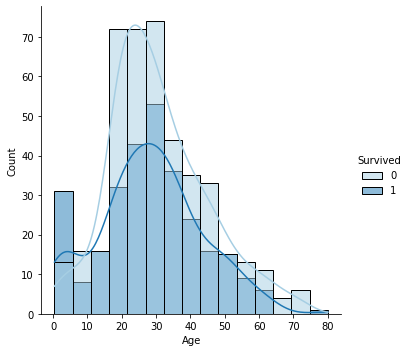

In [667]:
sns.displot( data = train, x = 'Age', bins = 15, hue = 'Survived', color = 'r', kde = True )

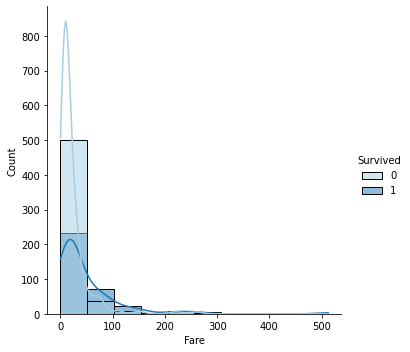

In [668]:
sns.displot( data = train, x = 'Fare', bins = 10, hue = 'Survived', color = 'r', kde = True )

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

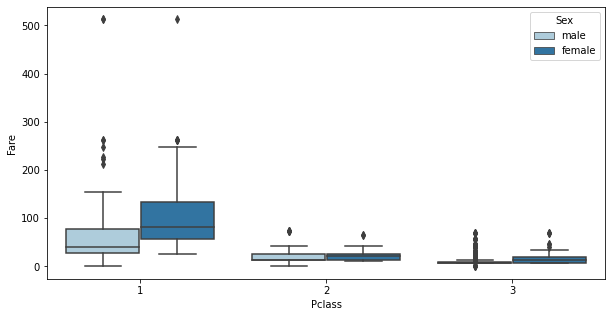

In [669]:
sns.boxplot( x = 'Pclass', y = 'Fare', hue = 'Sex', data = train )

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

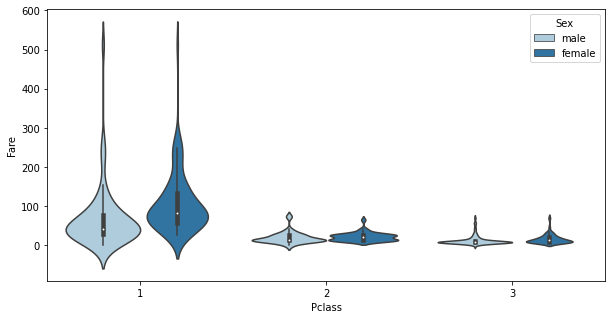

In [670]:
sns.violinplot( x = 'Pclass', y = 'Fare', hue = 'Sex', data = train )

In [671]:
train.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,3.243547
std,0.486592,0.836071,14.526497,49.693429,0.618216
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,7.910400,3.000000
50%,0.000000,3.000000,28.000000,14.454200,3.000000
75%,1.000000,3.000000,38.000000,31.000000,4.000000
max,1.000000,3.000000,80.000000,512.329200,4.000000


In [672]:
train[['Age', 'Name', 'Pclass', 'Sex']].groupby( by = ['Name', 'Pclass', 'Sex'] ).median()

Age
Name               Pclass Sex         
Master             1      male     4.0
                   2      male     1.0
                   3      male     4.0
Mr                 1      male    40.0
                   2      male    31.0
                   3      male    26.0
Mrs/Married        1      female  41.5
                   2      female  32.0
                   3      female  31.0
ProfessionalFemale 1      female  30.0
                   2      female  24.0
                   3      female  18.0
ProfessionalMale   1      female  49.0
                          male    49.0
                   2      male    46.5

In [673]:
def impute_age( x ):
    if( pd.isnull( x['Age'] ) ):
        if( x['Name'] == 'Master' ):
            if( x['Pclass'] == 1 ):
                return 4
            elif( x['Pclass'] == 2 ):
                return 1
            else:
                return 4
        elif( x['Name'] == 'Mr' ):
            if( x['Pclass'] == 1 ):
                return 40
            elif( x['Pclass'] == 2 ):
                return 31
            else:
                return 26
        elif( x['Name'] == 'Mrs/Married' ):
            if( x['Pclass'] == 1 ):
                return 41.5
            elif( x['Pclass'] == 2 ):
                return 32
            else:
                return 31
        elif( x['Name'] == 'ProfessionalFemale' ):
            if( x['Pclass'] == 1 ):
                return 30
            elif( x['Pclass'] == 2 ):
                return 24
            else:
                return 18
        elif( x['Name'] == 'ProfessionalMale' ):
            if( x['Pclass'] == 1 ):
                return 49
            elif( x['Pclass'] == 2 ):
                return 49
            else:
                return 46.5
    else:
        return x['Age']

In [674]:
for data in combined:
    data['Age'] = data.apply( impute_age, axis = 1 )

In [675]:
# Name = { 'Mr' : 1, 'ProfessionalMale' : 2, 'Master' : 3, 'ProfessionalFemale' : 4, 'Mrs/Married' : 5 }
# for data in combined:
#     data['Name'] = data['Name'].map( Name )

In [676]:
train[['Pclass', 'Fare', 'FamilySize']].groupby( by = ['Pclass', 'FamilySize'] ).median()

Fare
Pclass FamilySize          
1      2           263.0000
       3            31.0000
       4            79.2000
2      2            20.8750
       3            13.0000
       4            26.0000
3      1            69.5500
       2            31.2750
       3             7.8958
       4            15.5000

In [677]:
display( test.loc[test['Fare'].isnull()] )
test.loc[test['Fare'].isnull(), 'Fare'] = 31

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CabinCat
152,3,Mr,male,60.5,NaN,S,3,M


In [678]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

<AxesSubplot:xlabel='Pclass', ylabel='count'>

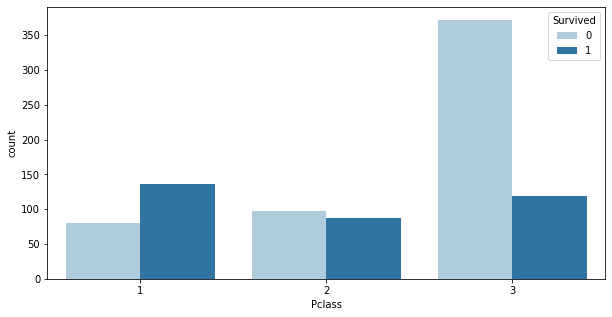

In [679]:
sns.countplot( x = 'Pclass', hue = 'Survived', data = train )

In [680]:
train[['Survived', 'Pclass', 'Sex']].groupby( by = ['Pclass', 'Sex'] ).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [681]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CabinCat
0,0,3,Mr,male,22.0,7.2500,S,4,M
1,1,1,Mrs/Married,female,38.0,71.2833,C,4,ABC
2,1,3,ProfessionalFemale,female,26.0,7.9250,S,3,M
3,1,1,Mrs/Married,female,35.0,53.1000,S,4,ABC
4,0,3,Mr,male,35.0,8.0500,S,3,M


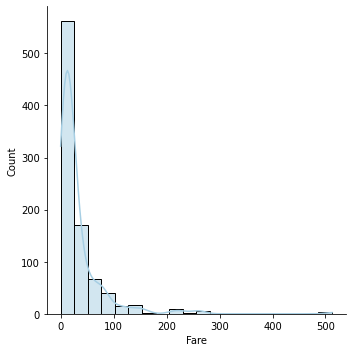

In [682]:
sns.displot( x = train['Fare'], bins = 20, kde = True )

In [683]:
train[['Fare', 'Pclass']].groupby( by = 'Pclass' ).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))
#37


def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

combined = process_ticket()

In [684]:
# for data in combined:
#     data.loc[ data['Fare'] <= 15, 'Fare' ] = 1
#     data.loc[ ( data['Fare'] > 15 ) & ( data['Fare'] <= 80 ), 'Fare' ] = 2
#     data.loc[ data['Fare'] > 80, 'Fare' ] = 3
#     data.loc[ data['Age'] <= 15, 'Age' ] = 3
#     data.loc[ ( data['Age'] > 15 ) & ( data['Age'] <= 40 ) , 'Age' ] = 2
#     data.loc[ data['Age'] > 40, 'Age' ] = 1

In [685]:
# Sex = { 'male' : 0, 'female' : 1 }
# Embarked = {'C' : 1, 'S' : 2, 'Q' : 3 }
# for data in combined: 
#     data['Sex'] = data['Sex'].map( Sex )
#     data['Embarked'] = data['Embarked'].map( Embarked )

In [686]:
train[['Fare', 'Survived', 'Pclass']].groupby( by = ['Fare', 'Pclass'] ).mean().sort_values( by = 'Survived', ascending = False )

,,Survived
Fare,Pclass,
512.3292,1,1.0
57.0000,1,1.0
57.9792,1,1.0
59.4000,1,1.0
13.8625,2,1.0
...,...,...
15.0500,2,0.0
15.1000,3,0.0
15.5500,3,0.0


In [687]:
train.dtypes

Survived        int64
Pclass          int64
Name           object
Sex            object
Age           float64
Fare          float64
Embarked       object
FamilySize      int64
CabinCat       object
dtype: object

In [688]:
test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CabinCat
0,3,Mr,male,34.5,7.8292,Q,3,M
1,3,Mrs/Married,female,47.0,7.0000,S,4,M
2,2,Mr,male,62.0,9.6875,Q,3,M
3,3,Mr,male,27.0,8.6625,S,3,M
4,3,Mrs/Married,female,22.0,12.2875,S,4,M


In [689]:
enc = preprocessing.OneHotEncoder()
enc_train = pd.concat( [ pd.DataFrame( enc.fit_transform( train[[ 'Name', 'Embarked', 'CabinCat', 'FamilySize' ] ] ).toarray(), columns = enc.get_feature_names()), train[['Pclass', 'Age', 'Fare'] ]  ], axis = 1 ) 
X = enc_train.values
Y = train['Survived'].values

enc_test = pd.concat( [ pd.DataFrame( enc.fit_transform( test[[ 'Name', 'Embarked', 'CabinCat', 'FamilySize' ] ] ).toarray(), columns = enc.get_feature_names()), test[['Pclass', 'Age', 'Fare'] ]  ], axis = 1 ) 
test_X = enc_test.values

In [690]:
enc.get_feature_names()

array(['x0_Master', 'x0_Mr', 'x0_Mrs/Married', 'x0_ProfessionalFemale',
       'x0_ProfessionalMale', 'x1_C', 'x1_Q', 'x1_S', 'x2_ABC', 'x2_DE',
       'x2_FG', 'x2_M', 'x3_1', 'x3_2', 'x3_3', 'x3_4'], dtype=object)

In [691]:
X[0]

array([ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  3.  , 22.  ,
        7.25])

# Modelling #

In [706]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC, GradientBoostingClassifier as GBC
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from catboost import Pool, CatBoostClassifier, cv
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

In [693]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 ) 

In [694]:
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [695]:
model = RFC( n_estimators = 100, max_depth = 5, max_features = 5, oob_score = True ).fit( X, Y )
print( model.oob_score_ )
print( model.score( X, Y ) )

0.8395061728395061
0.8507295173961841


Text(0.5, 0, 'Relative Importance')

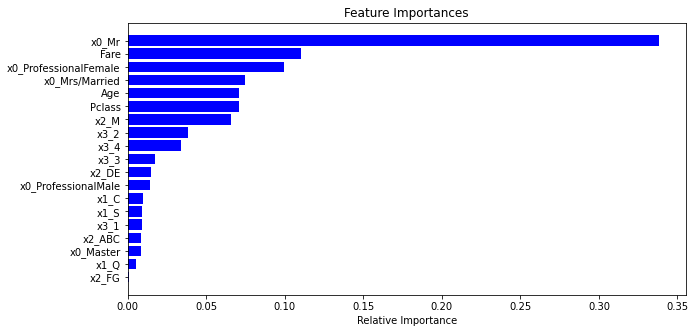

In [696]:
features = enc_train.columns
importances = model.feature_importances_
indices = np.argsort( importances )

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [697]:
model1 = RFC(n_estimators=100, max_depth=5, random_state=1)
model1.fit(X, Y)
#y1_test = model1.predict(X_test)

model2 = XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.05)
model2.fit(X, Y)
#y2_test = model2.predict(X_test)

model3 = SVC(random_state=1)
model3.fit(X,Y)
#y3_test = model3.predict(X_test)

model4 = GBC(random_state=42)
model4.fit(X, Y)
#y4_test = model4.predict(X_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [698]:
model1_preds = cross_val_predict(model1, X, Y, cv=10)
model1_acc = accuracy_score(Y, model1_preds)
model2_preds = cross_val_predict(model2, X, Y, cv=10)
model2_acc = accuracy_score(Y, model2_preds)
model3_preds = cross_val_predict(model3, X, Y, cv=10)
model3_acc = accuracy_score(Y, model3_preds)
model4_preds = cross_val_predict(model4, X, Y, cv=10)
model4_acc = accuracy_score(Y, model4_preds)

print("Random Forest Accuracy:", model1_acc, model1.score( X, Y ) )
print("XGBoost Accuracy:", model2_acc, model2.score( X, Y ) )
print("SVC Accuracy:", model3_acc, model3.score( X, Y ) )
print("GB Accuracy:", model4_acc, model4.score( X, Y ) )

Random Forest Accuracy: 0.8282828282828283 0.8574635241301908
XGBoost Accuracy: 0.8383838383838383 0.9326599326599326
SVC Accuracy: 0.6734006734006734 0.6857463524130191
GB Accuracy: 0.8395061728395061 0.9001122334455668


In [710]:
temp = { 'Survived' : model.predict( test_X ) }
predictions_df = pd.DataFrame( temp, columns = ['Survived'], index = pass_id )
predictions_df.to_csv( 'Downloads/prediction.csv' )

In [709]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RFC()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit( X, Y )
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 
                  'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 8}
    
    model = RFC(**parameters)
    model.fit( X, Y )